In [1]:
#Data processing
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from nptdms import TdmsFile #Process raw ramping file


Bad key "text.kerning_factor" on line 4 in
/uscms_data/d3/dhoang/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


# 1. Sample functions

**Note:**
- I sometimes refer to a sensor's data by channel.


- The `sample-data` directory is a segment of Ramp28 data in range (-10,0). With 0 being the time when the quench protection system kicks in and current starts dropping. 


- It has several `.npy` files. `ai0-ai5.npy` corresponds to 5 sensors around the magnet. `ai7.npy` is the current data. `time.npy` is the time relative to the quench of each data point in those files. 

In [3]:
#Loading data function
def load_channel_and_time(dir_path, channel):
    """Loading a channel from a directory and return a pandas data frame with two columns, channle and time"""
    
    data_frame = pd.DataFrame(data = {channel: np.load(dir_path + channel + ".npy"),
                                     "time": np.load(dir_path + "time.npy")})
    
    return data_frame


#Plot a single channel, used by next function
def plot_channel(data, channel, time_range = None):
    
    #Take data within the time range
    start = min(data["time"])
    end = max(data["time"])
    
    if time_range:
        start = time_range[0]
        end = time_range[1]
        
    data = data[(data["time"] > start) & (data["time"] < end)]
    
    #plot
    plt.figure(figsize=(20,2))
    plt.plot(data["time"], data[channel])
    plt.xlabel("Time (s)")
    plt.ylabel("Volt")
    plt.title("Variable {}".format(channel))
    plt.show()
    
    %reset -f in

#Plotting data function
def load_and_plot(dir_path, channel, time_range = None):
    """Load a particular channel from a quench, and then plot it.  
    """
    ai = load_channel_and_time(dir_path, channel)
    
    plot_channel(ai, channel, time_range = time_range)
    
    #Just for dumping data from RAM on the server, needed when processing larger amount of data
    #don't need to worry about this for now. 
    %reset -f in
    
#Spectrogram plotting function
def plot_spectrogram(dir_path, channel, time_range, window = 1500, step = 10, window_type = 'hanning'):
    
    #Select appropriate time segment
    data = load_channel_and_time(dir_path, channel)

    start = time_range[0]
    end = time_range[1]

    data = data[(data["time"] > start) & (data["time"] < end)]


    from scipy import signal
    
    #FFT
    freqs, times, Sx = signal.spectrogram(data[channel], fs=100000, window= window_type,
                                      nperseg=window, noverlap= window - step,
                                      detrend=False, scaling='spectrum')
    
    #Dump data from RAM
    %reset -f in
    
    #Plot!
    f, ax = plt.subplots(figsize=(20,2))
    ax.pcolormesh(times, freqs / 1000, 10 * np.log10(Sx), cmap='viridis')
    ax.set_title("Spectrogram of sensor {}".format(channel))
    ax.set_ylabel('Frequency [kHz]')
    ax.set_xlabel('Time [s]');
    

## 2. Sample usage

### 2.1 Plot an particular event from Ramp28 that DNN detected

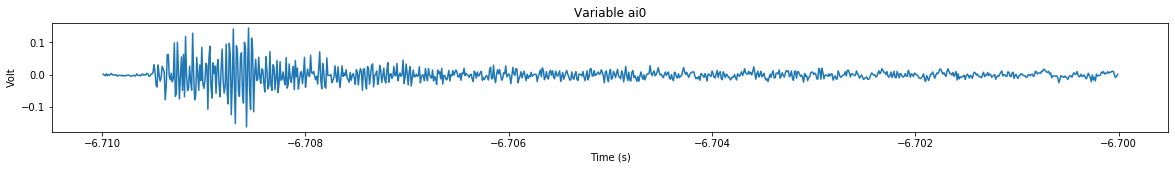

Flushing input history
Flushing input history


In [4]:
load_and_plot("./sample-data/", "ai0", time_range = (-6.710, -6.70))

### 2.2 Plot its spectrogram

Flushing input history


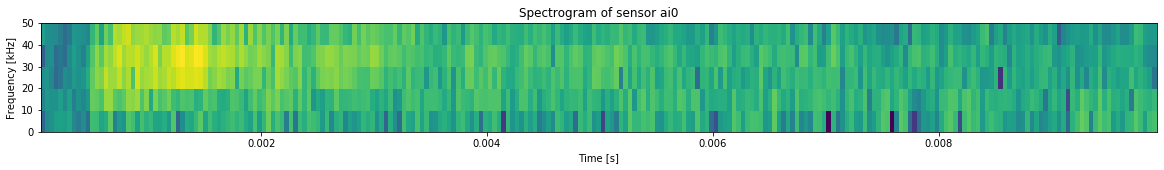

In [12]:
plot_spectrogram("./data/Ramp28/", "ai0", time_range = (-6.710, -6.70), window = 10, step = 4)